In [1]:
# classify phase 0, 1, 2, 3, 4 at cardiac action potentials

In [6]:
import sys
import subprocess

# Install the wfdb package using pip
subprocess.check_call([sys.executable, "-m", "pip", "install", "wfdb"])

  Using cached wfdb-4.1.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached soundfile-0.12.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (14 kB)
Using cached wfdb-4.1.2-py3-none-any.whl (159 kB)
Using cached soundfile-0.12.1-py2.py3-none-macosx_11_0_arm64.whl (1.1 MB)



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


0

In [10]:
import sys
import subprocess

# Install the pyABF package using pip
subprocess.check_call([sys.executable, "-m", "pip", "install", "pyabf"])



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


0

In [ ]:
######################### BUILD THE DATASET ############################

In [107]:
# Function to plot phases based on given start and end times
def plot_phases(sweepX, sweepY, phase_times):
    plt.figure(figsize=(15, 6))
    
    # Define colors for each phase
    colors = {
        0: "red",
        1: "orange",
        2: "yellow",
        3: "green",
        4: "blue"
    }
    
    # Plot the original signal
    plt.plot(sweepX, sweepY, label="Original Signal", color='black')
    
    # Plot each phase with a distinct color
    for phase, (start_time, end_time) in enumerate(phase_times):
        phase_indices = np.where((sweepX >= start_time) & (sweepX <= end_time))[0]
        plt.plot(sweepX[phase_indices], sweepY[phase_indices], '.', color=colors[phase], label=f"Phase {phase}")
    
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (pA or mV)")
    plt.title("Action Potential Phases")
    plt.legend()
    plt.grid(True)
    plt.show()

In [523]:
# define save function

import csv
import os

def save_to_csv(sweepX, sweepY, phase_times, csv_file_path, random_sweep_index):
    # Save phase times and derivatives to CSV
    file_exists = os.path.isfile(csv_file_path)
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(['File Path', 'Phase', 'Start Time (s)', 'End Time (s)', 'X Values', 'Y Values', 'Sweep Index'])
        for phase, (start_time, end_time) in enumerate(phase_times):
            phase_indices = np.where((sweepX >= start_time) & (sweepX <= end_time))[0]
            phase_x_values = sweepX[phase_indices].tolist()
            phase_y_values = sweepY[phase_indices].tolist()
            writer.writerow([file_path, phase, start_time, end_time, phase_x_values, phase_y_values, random_sweep_index])
    
    print(f"Phase times and x,y saved to {csv_file_path}")

In [569]:
# import packages
import pyabf
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# read the file
# Define the path to the Excel file
excel_file_path = "/Users/b/bio/cardiac/Pennsieve-dataset-297-version-1/files/primary/manifest.xlsx"

# Read the Excel file
df = pd.read_excel(excel_file_path)

# Select the "filename" column
filenames = df['filename']

# Choose a random filename
random_filename = random.choice(filenames)

file_path = "/Users/b/bio/cardiac/Pennsieve-dataset-297-version-1/files/primary/" + random_filename
print(f"Randomly chosen filename: {random_filename}")

# Load the ABF file
abf = pyabf.ABF(file_path)

# Get the total number of sweeps
sweep_count = abf.sweepCount

# Choose a random sweep index
random_sweep_index = random.randint(0, sweep_count - 1)
print(f"Randomly chosen sweep index: {random_sweep_index}")

Randomly chosen filename: sub-2-6-2020/sam-2020-02-06-0004-CF/2020_02_06_0004_CF.abf
Randomly chosen sweep index: 184


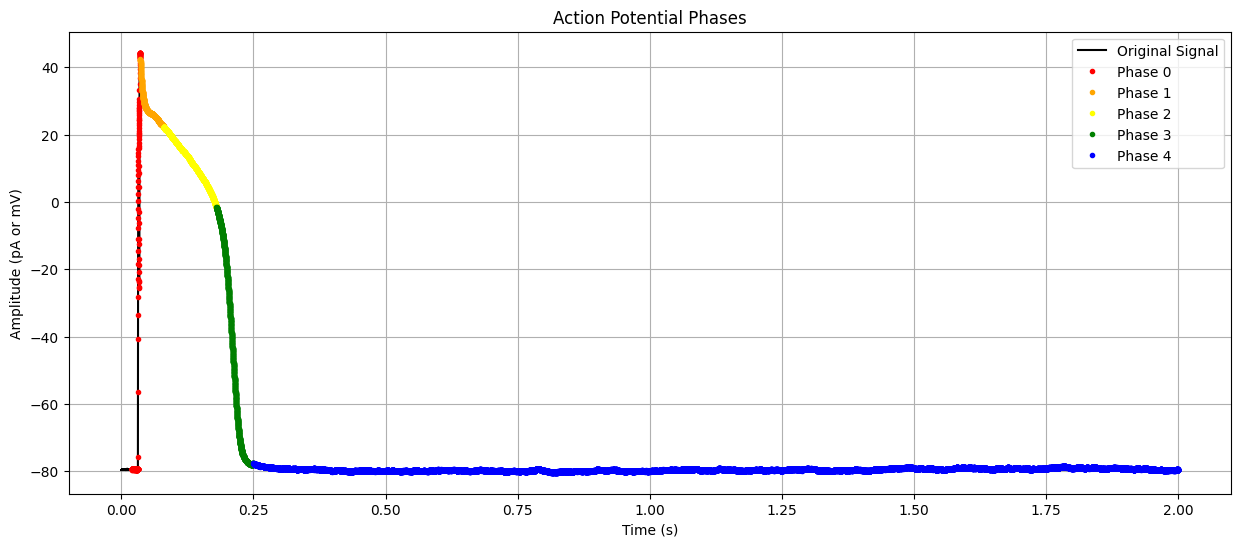

In [577]:
##### Analyze and get the sweep data
abf.setSweep(random_sweep_index)
sweepX = abf.sweepX
sweepY = abf.sweepY


# Define the phase times (start_time, end_time) for each phase
phase_times = [
    (0.02, 0.036),  # Phase 0
    (0.036, 0.08),  # Phase 1
    (0.08, 0.18),  # Phase 2
    (0.18, 0.25),  # Phase 3
    (0.25, 2.0)   # Phase 4
]

# Plot the phases
plot_phases(sweepX, sweepY, phase_times)

In [578]:
# Define the CSV file path to save the phase times
csv_file_path = "/Users/b/bio/cardiac/phases.csv"

#save to CSV
save_to_csv(sweepX, sweepY, phase_times, csv_file_path, random_sweep_index)



Phase times and x,y saved to /Users/b/bio/cardiac/phases.csv


In [579]:
# train the classifier

In [ ]:
# the classifier will read in a sweep and output the domain for each of the phases. 
# train a single classifier to output the phases

In [583]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv('/Users/b/bio/cardiac/phases.csv')


<bound method NDFrame.head of                                              File Path  Phase  Start Time (s)  \
0    /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      0           0.025   
1    /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      1           0.035   
2    /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      2           0.100   
3    /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      3           0.300   
4    /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      4           0.450   
..                                                 ...    ...             ...   
110  /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      0           0.020   
111  /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      1           0.036   
112  /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      2           0.080   
113  /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      3           0.180   
114  /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      4           0.250  

In [607]:
dataset = {}

# read file, sweep number, phase number
index = 0
file = df['File Path'][index]
sweepNum = df['Sweep Number'][index]
phaseNum = df['Phase'][index]
abf = pyabf.ABF(file)
abf.setSweep(sweepNum)

# Extract sweepX and sweepY
sweepX = abf.sweepX
sweepY = abf.sweepY

# Create a list of tuples (x, y)
totalSweep = list(zip(sweepX, sweepY))

phase0_x = df['X Values'][index]
phase0_y = df['Y Values'][index]
phase0 = list(zip(phase0_x, phase0_y))

phase1_x = df['X Values'][index+1]
phase1_y = df['Y Values'][index+1]
phase1 = list(zip(phase1_x, phase1_y))

phase2_x = df['X Values'][index+2]
phase2_y = df['Y Values'][index+2]
phase2 = list(zip(phase2_x, phase2_y))

phase3_x = df['X Values'][index+3]
phase3_y = df['Y Values'][index+3]
phase3 = list(zip(phase3_x, phase3_y))

phase4_x = df['X Values'][index+4]
phase4_y = df['Y Values'][index+4]
phase4 = list(zip(phase4_x, phase4_y))

dataset[str(totalSweep)] = [phase0, phase1, phase2, phase3, phase4]

index+=5

print(df['Phase'][index])
print(len(df))





0
115


In [612]:
import ast

table = {}
table[1] = 4
print(table[1])
lst = [0, 1, 2, 3, 4]
print(str(lst))
print(ast.literal_eval(str(lst)))

4
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [ ]:
# Phase 0 classifier
dataset = {}

# read file, sweep number, phase number
index = 0
file = df['File Path'][index]
sweepNum = df['Sweep Number'][index]
phaseNum = df['Phase'][index]
abf = pyabf.ABF(file)
abf.setSweep(sweepNum)

# Extract sweepX and sweepY
sweepX = abf.sweepX
sweepY = abf.sweepY

# Create a list of tuples (x, y)
totalSweep = list(zip(sweepX, sweepY))

phase0_x = df['X Values'][index]
phase0_y = df['Y Values'][index]
phase0 = list(zip(phase0_x, phase0_y))

phase1_x = df['X Values'][index+1]
phase1_y = df['Y Values'][index+1]
phase1 = list(zip(phase1_x, phase1_y))

phase2_x = df['X Values'][index+2]
phase2_y = df['Y Values'][index+2]
phase2 = list(zip(phase2_x, phase2_y))

phase3_x = df['X Values'][index+3]
phase3_y = df['Y Values'][index+3]
phase3 = list(zip(phase3_x, phase3_y))

phase4_x = df['X Values'][index+4]
phase4_y = df['Y Values'][index+4]
phase4 = list(zip(phase4_x, phase4_y))

dataset[str(totalSweep)] = [phase0, phase1, phase2, phase3, phase4]
